<a href="https://colab.research.google.com/github/Rus8921/Work_with_data/blob/main/%D0%9D%D0%B0%D1%87%D0%B0%D0%BB%D0%BE_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B_%D1%81_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import библиотек

In [90]:
import pandas as pd
from google.colab import files 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

# Загрузка данных на Google Drive

In [77]:
uploaded = files.upload()

Saving cars_moldova_clean.csv to cars_moldova_clean (1).csv


# Считываем файл в DataFrame



метод .read_csv(path,delimiter) 

In [126]:
df = pd.read_csv('/content/cars_moldova_clean.csv') 
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,1,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,0,8550.0,8,16875.000000
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,0,6550.0,10,11000.000000
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,0,4100.0,16,12500.000000
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,0,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,1,11500.0,6,14666.666667
32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,0,4400.0,20,11250.000000
32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,0,7000.0,7,12714.285714
32218,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,0,4000.0,16,23125.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  object 
 1   Model                 32220 non-null  object 
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  object 
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  object 
 7   Transmission          32220 non-null  int64  
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


посмотрим на то, какие у нас есть категориальные и численные столбцы

In [93]:
cat_columns = []#  создаем два списка в ктороые заносим данные разных типов и подсчитываем их, один- категориальные данные (тип object), остальные - числовые 
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type'] 
 Число столблцов =  4
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Transmission', 'Price(euro)', 'Age', 'km_year'] 
 Число столблцов =  7


рассмотрим гистограммы (распределение) значений по каждому числовому признаку (столбцу)

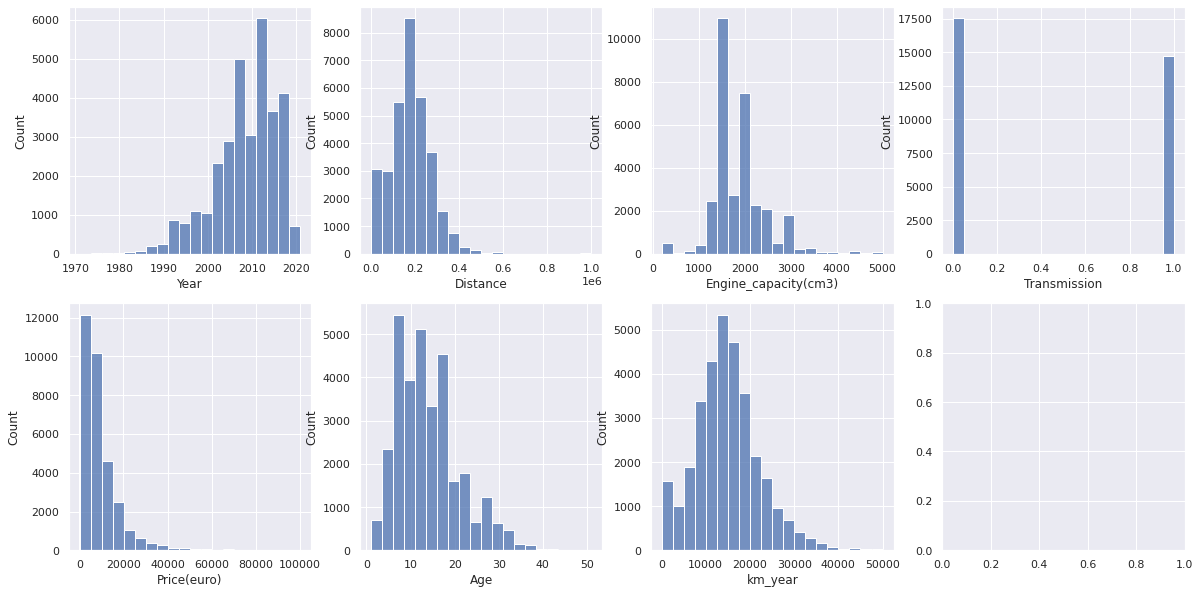

In [94]:
width = 4
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(20,10)) # в фиг сайз мы задаем размеры самой картинки, в height -  мы задаем сколько графиков у нас будет в высоту(в данном случае кол-во столбцов с числовыми данными / width )
# width -  сколько графиклв у нас будет в ширину  
# задаем параметры графиков ну  и sns.histplot - это тип графика, а именно гистограмма 
for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

Посмотрим на scaterplot

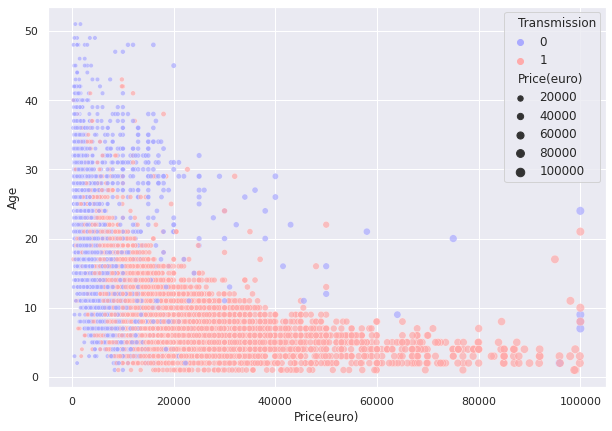

In [95]:
plt.figure(figsize=(10,7))
sns.scatterplot(    
    data=df,
    x="Price(euro)", y="Age",
    hue="Transmission", 
    size = "Price(euro)", alpha = 0.7,
             palette='bwr'
    );

Теперь попробуем внести сюда категориальные признаки 

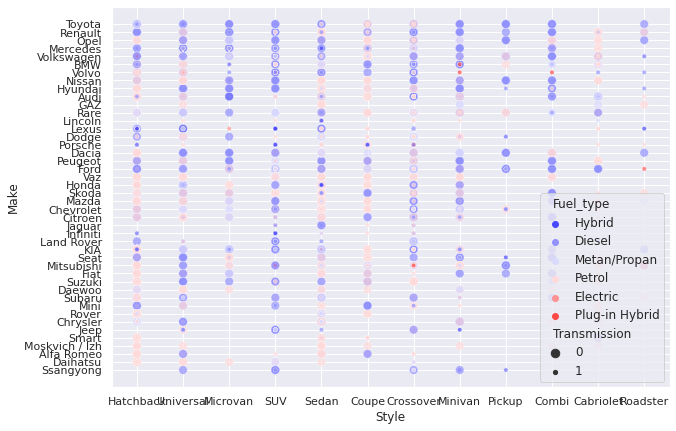

In [96]:
plt.figure(figsize=(10,7))
sns.scatterplot(    
    data=df,
    x="Style", y="Make",
    hue="Fuel_type", 
    size = "Transmission", alpha = 0.7,
             palette='bwr'
    );
    # получается что по х- идут стиль машины, по у- у нас производители, точками мы смотрим какой тип топлива и тип точки - какая у нее трансмиссия 

Давайте посмотрим  насколько дорогие машины у производителей

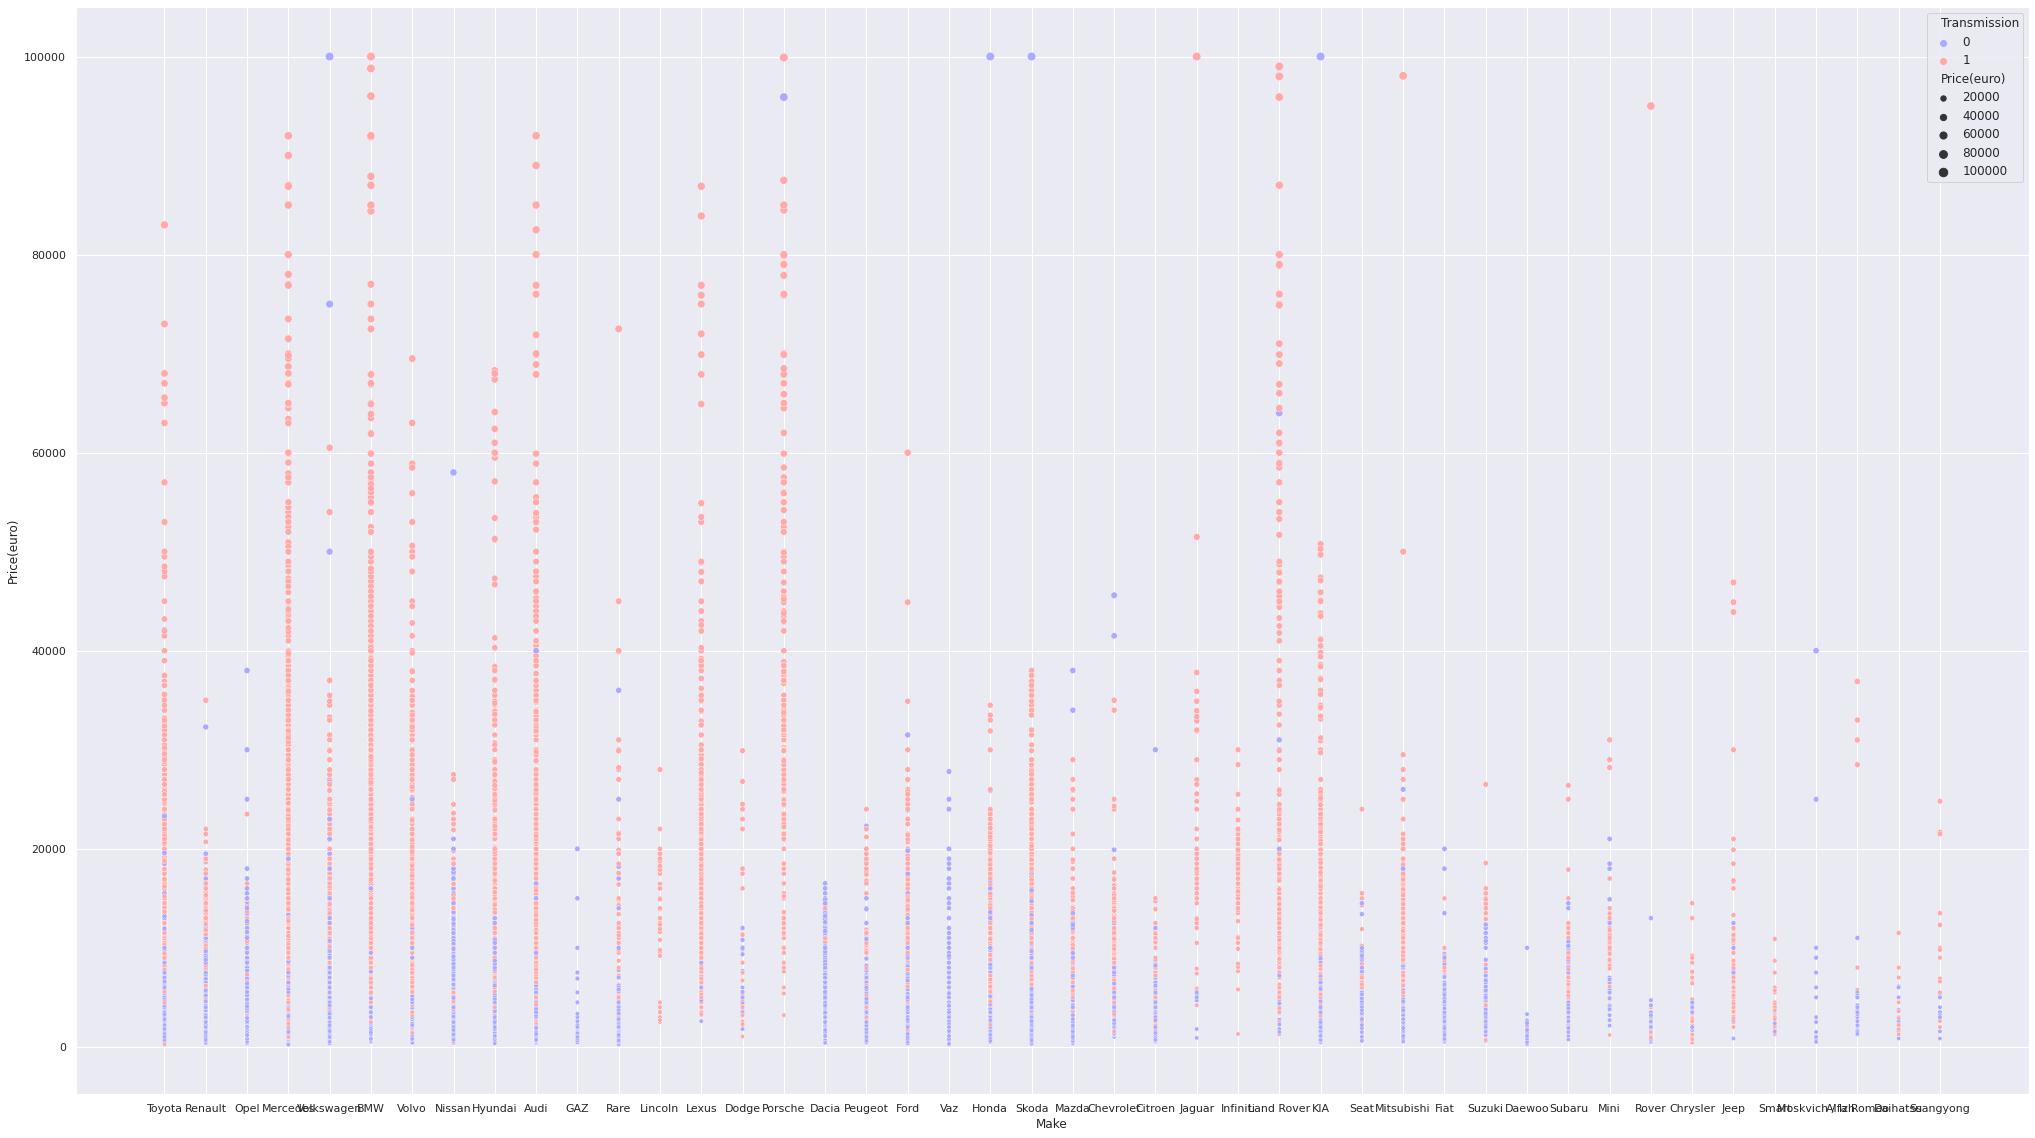

In [101]:
plt.figure(figsize=(35,20))
sns.scatterplot(    
    data=df,
    x="Make", y="Price(euro)",
    hue="Transmission", 
    size = "Price(euro)", alpha = 1,
             palette='bwr'
    );

Посмотрим на зависимость цены от типа трансмиссии 

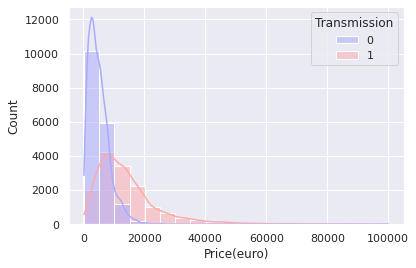

In [85]:
sns.histplot(data = df, 
             x = 'Price(euro)', 
             hue = 'Transmission', 
             bins = 20, kde = True,
             palette='bwr')


### Добавление колонки




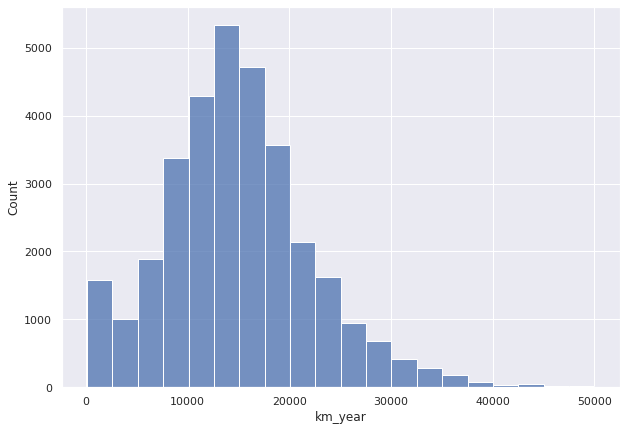

In [124]:
df['Age'] = 2022 - df.Year 
df['km_year'] = df.Distance/df.Age 
question_km_year = df[df.km_year > 50e3]
df = df.drop(question_km_year.index)
question_km_year = df[df.km_year < 100]
df = df.drop(question_km_year.index)
df = df.reset_index(drop=True)


plt.figure(figsize=(10,7))
sns.histplot(data=df,
            x='km_year', bins = 20);

In [86]:
df[cat_columns].nunique() # смотрим сколько у нас повторений

Make          44
Model        136
Style         12
Fuel_type      6
dtype: int64

In [105]:
counts = df.Make.value_counts()# делаем список с данными(кол-во сделанных машин производителем) и кол-вом их повторений 
counts

Volkswagen        3423
Toyota            3083
Mercedes          3015
BMW               2594
Renault           2346
Opel              1824
Skoda             1730
Audi              1546
Dacia             1344
Ford              1343
Nissan            1252
Hyundai           1216
Honda              893
KIA                655
Mitsubishi         614
Lexus              595
Volvo              575
Vaz                471
Mazda              439
Peugeot            388
Chevrolet          322
Citroen            295
Land Rover         285
Rare               252
Seat               239
Porsche            190
Fiat               183
Suzuki             153
Subaru             150
Rover               92
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Dodge               49
Lincoln             49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 31
Moskvich / Izh      30
Daihatsu   

In [88]:
counts[counts<100] # смотрим сколько у нас данных повторяются меньше 100 раз 

Rover             92
Chrysler          83
Jeep              77
Mini              72
Infiniti          67
Jaguar            64
Daewoo            63
Dodge             49
Lincoln           49
Alfa Romeo        38
Smart             33
Ssangyong         32
GAZ               31
Moskvich / Izh    30
Daihatsu          25
Name: Make, dtype: int64

In [112]:
rare =  counts[(counts.values < 25) ] # смотрим сколько у нас данных с повторениями меньше 25 и делаем подних отдельный пунтк  Rare в списке, видими что таких 252
df['Make'] = df['Make'].replace(rare.index.values, 'Rare')
df.Make.value_counts()

Volkswagen        3423
Toyota            3083
Mercedes          3015
BMW               2594
Renault           2346
Opel              1824
Skoda             1730
Audi              1546
Dacia             1344
Ford              1343
Nissan            1252
Hyundai           1216
Honda              893
KIA                655
Mitsubishi         614
Lexus              595
Volvo              575
Vaz                471
Mazda              439
Peugeot            388
Chevrolet          322
Citroen            295
Land Rover         285
Rare               252
Seat               239
Porsche            190
Fiat               183
Suzuki             153
Subaru             150
Rover               92
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Dodge               49
Lincoln             49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 31
Moskvich / Izh      30
Daihatsu   